# Self-Supervised Denoising with CNN using PyTorch

In [8]:
import numpy as np
import matplotlib.pyplot as plt 
import torch, torch.nn   as nn 
from IPython.display     import display, clear_output

In [31]:
true_object_np = plt.imread('leopard.jpeg')
true_object_np = 0.1*true_object_np[:,:,0]

In [25]:
def np_to_torch(np_array):      return torch.from_numpy(np_array).float()
def torch_to_np(torch_array):   return np.squeeze(torch_array.detach().cpu().numpy())

device         = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

true_object_torch    = np_to_torch(true_object_np).to(device)
noisy_image_torch    = torch.poisson(true_object_torch)
noisier_image_torch  = torch.poisson(torch.poisson(noisy_image_torch))

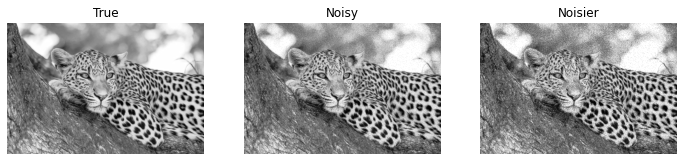

In [26]:
fig1, axs1 = plt.subplots(1,3, figsize=(12,4)) # No. rows, cols,  figsize Width,Height (inches)
axs1[0].imshow(torch_to_np(true_object_torch),cmap='Greys_r'); axs1[0].set_title('True'); axs1[0].set_axis_off();
axs1[1].imshow(torch_to_np(noisy_image_torch), vmin=0,vmax=np.max(true_object_np),cmap='Greys_r'); axs1[1].set_title('Noisy'); axs1[1].set_axis_off();
axs1[2].imshow(torch_to_np(noisier_image_torch), vmin=0,vmax=np.max(true_object_np),cmap='Greys_r'); axs1[2].set_title('Noisier'); axs1[2].set_axis_off();

In [27]:
class CNN(nn.Module):
    def __init__(self, num_channels):
        super(CNN, self).__init__()
        self.CNN = nn.Sequential(
            nn.Conv2d(1,            num_channels, 3, padding=1), nn.PReLU(),
            #nn.Conv2d(num_channels, num_channels, 3, padding=1), nn.PReLU(),
            #nn.Conv2d(num_channels, num_channels, 3, padding=1), nn.PReLU(),
            nn.Conv2d(num_channels, 1,            3, padding=1), nn.PReLU()
        )
    def forward(self, x):
        x = torch.squeeze(self.CNN(x.unsqueeze(0).unsqueeze(0)))
        return x
    
cnn = CNN(64).to(device)

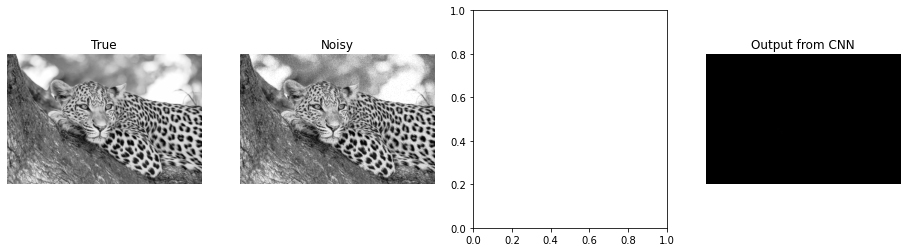

In [29]:
#######
output_cnn = cnn(noisy_image_torch)
fig1, axs1 = plt.subplots(1,4, figsize=(16,4)) # No. rows, cols,  figsize Width,Height (inches)
axs1[0].imshow(torch_to_np(true_object_torch), vmin=0,vmax=np.max(true_object_np), cmap='Greys_r'); axs1[0].set_title('True'); axs1[0].set_axis_off();
axs1[1].imshow(torch_to_np(noisy_image_torch), vmin=0,vmax=np.max(true_object_np), cmap='Greys_r'); axs1[1].set_title('Noisy'); axs1[1].set_axis_off();
axs1[3].imshow(torch_to_np(output_cnn), vmin=0,vmax=np.max(true_object_np), cmap='Greys_r'); axs1[3].set_title('Output from CNN'); axs1[3].set_axis_off();

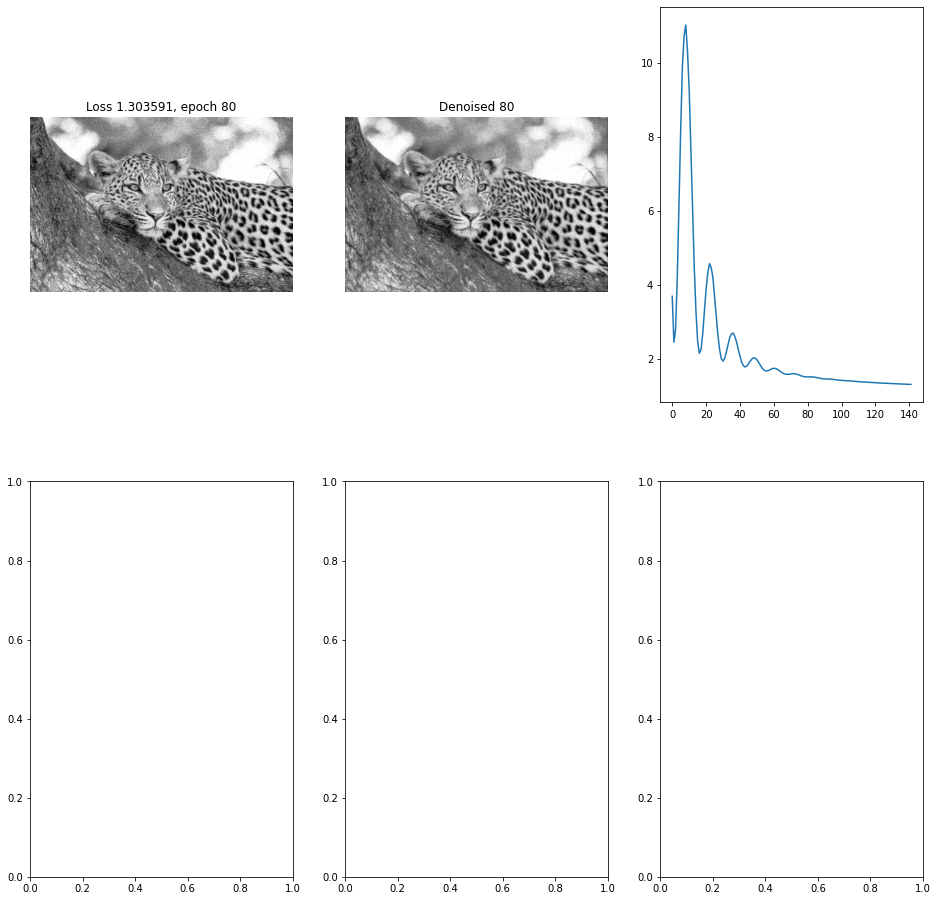

In [30]:
# TRAIN THE NETWORK
loss_fun  = nn.MSELoss()
optimiser = torch.optim.Adam(cnn.parameters(), lr=1e-3)

train_loss = list()
epochs     = 100

for ep in range(epochs):
    optimiser.zero_grad() # set the gradients to zero
    output_cnn = cnn(noisy_image_torch)
    loss = loss_fun(torch.squeeze(output_cnn), torch.squeeze(true_object_torch))
 

    denoised_result = output_cnn
    
    train_loss.append(loss.item())
    loss.backward() # Find the gradients
    optimiser.step() # Does the update  
    
    if ep % 20 == 0:
        fig2, axs2 = plt.subplots(2,3, figsize=(16,16)) # No. rows, cols,  figsize Width,Height (inches)
        axs2[0,0].set_axis_off(); axs2[0,1].set_axis_off() 
        axs2[0,0].imshow(torch_to_np(noisy_image_torch), vmin=0,vmax=np.max(true_object_np),cmap='Greys_r'); axs2[0,0].set_title('Noisy Input %d x %d' % (true_object_np.shape[0],true_object_np.shape[1]))
        axs2[0,1].imshow(torch_to_np(denoised_result), vmin=0,vmax=np.max(true_object_np), cmap='Greys_r'); axs2[0,1].set_title('Denoised %d' % (ep))
        axs2[0,2].plot(train_loss[19:-1]);  axs2[0,0].set_title('Loss %f, epoch %d' % (train_loss[-1],ep));   
        clear_output(wait=True); plt.pause(0.001)
    
    output_cnn = cnn(noisy_image_torch)
    loss = loss_fun(torch.squeeze(output_cnn), torch.squeeze(true_object_torch))
 

    denoised_result = output_cnn
    
    train_loss.append(loss.item())
    loss.backward() # Find the gradients
    optimiser.step() # Does the update  
    
    if ep % 20 == 0:
        fig2, axs2 = plt.subplots(2,3, figsize=(16,16)) # No. rows, cols,  figsize Width,Height (inches)
        axs2[0,0].set_axis_off(); axs2[0,1].set_axis_off() 
        axs2[0,0].imshow(torch_to_np(noisy_image_torch), vmin=0,vmax=np.max(true_object_np),cmap='Greys_r'); axs2[0,0].set_title('Noisy Input %d x %d' % (true_object_np.shape[0],true_object_np.shape[1]))
        axs2[0,1].imshow(torch_to_np(denoised_result), vmin=0,vmax=np.max(true_object_np), cmap='Greys_r'); axs2[0,1].set_title('Denoised %d' % (ep))
        axs2[0,2].plot(train_loss[19:-1]);  axs2[0,0].set_title('Loss %f, epoch %d' % (train_loss[-1],ep));   
        clear_output(wait=True); plt.pause(0.001)